In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#data = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv")
data = pd.read_csv('heart_2022_no_nans.csv')
df = data.dropna(subset=['HadHeartAttack'])
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## EDA

In [4]:
for col in data.describe(include='object').columns:
    print('Column Name: ',col)
    print(data[col].unique())
    print('-'*50)

Column Name:  State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
--------------------------------------------------
Column Name:  Sex
['Female' 'Male']
--------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
--------------------------------------------------
Column Name:  LastCheckupTime
['Within past year (anytime less than 12 m

All categorical features are easily handled using one-hot encoding, as the number of categories is low. I will take a closer look at few of them. 

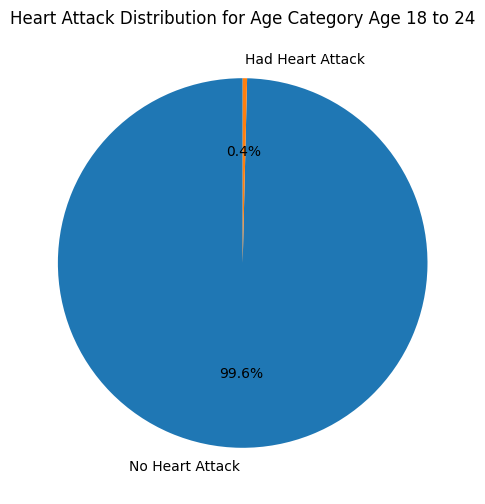

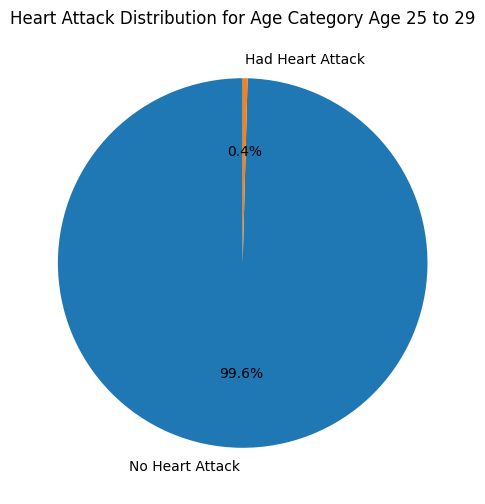

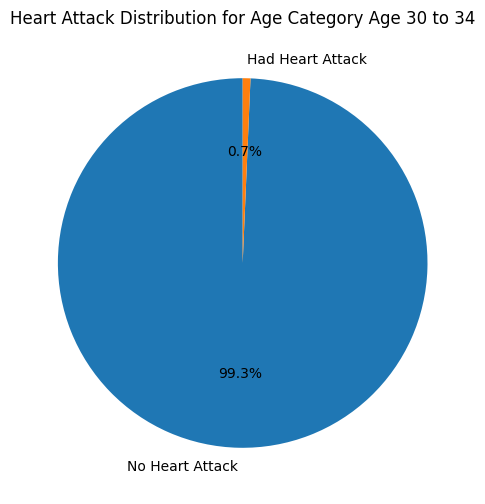

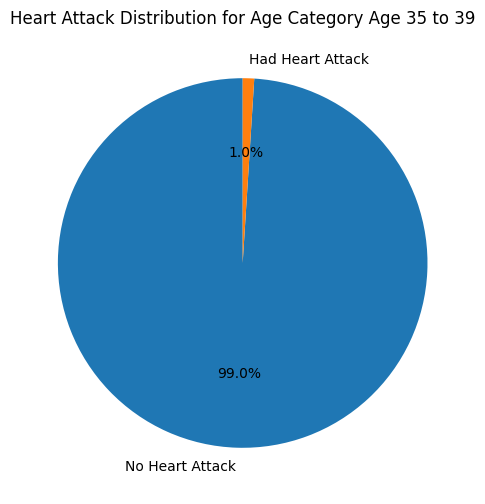

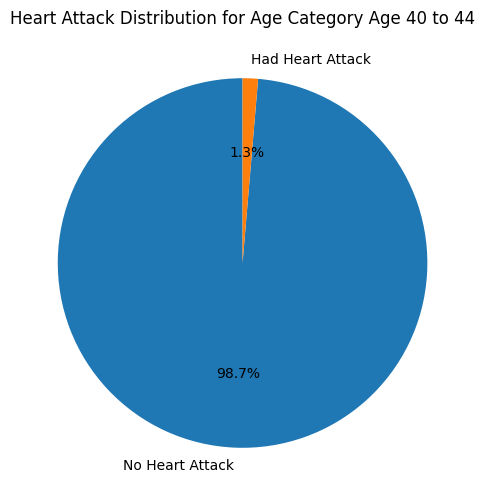

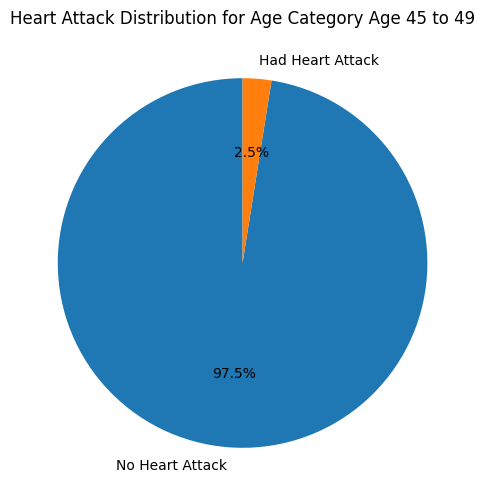

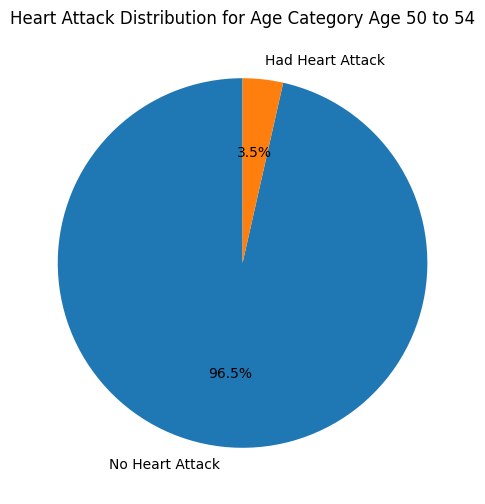

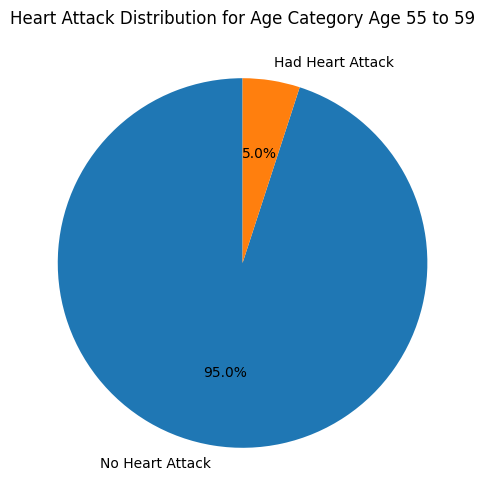

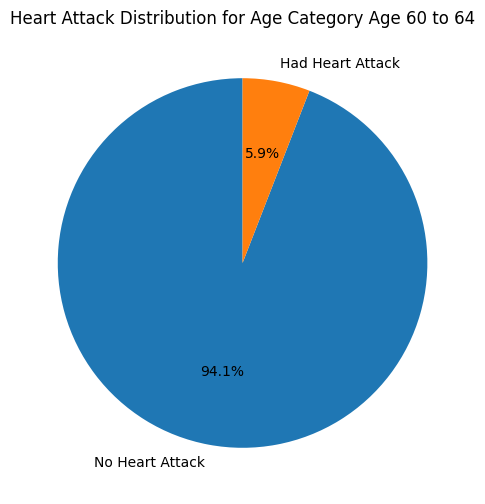

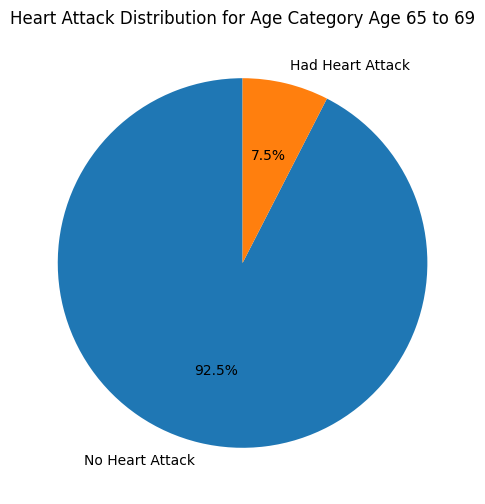

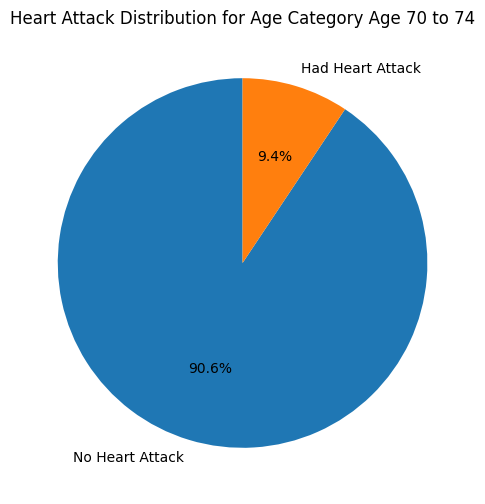

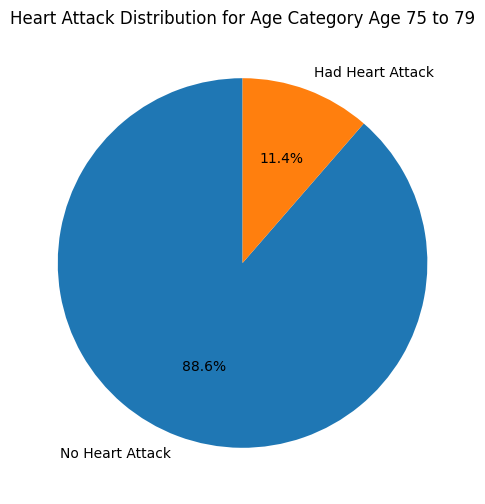

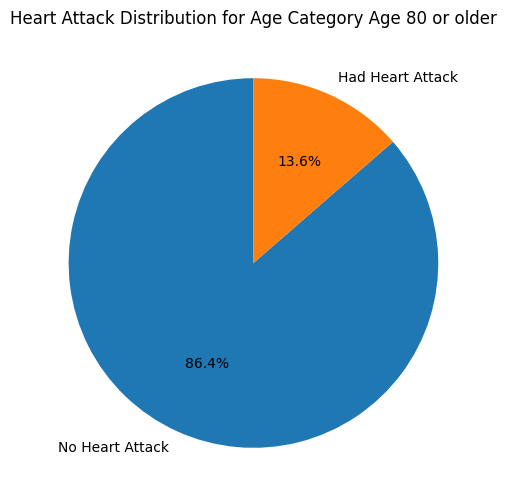

In [5]:
import matplotlib.pyplot as plt

grouped = data.groupby(['AgeCategory', 'HadHeartAttack']).size().unstack(fill_value=0)

# Plot pie charts for each AgeCategory
for age_category in grouped.index:
    values = grouped.loc[age_category]
    labels = ['No Heart Attack', 'Had Heart Attack']
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Heart Attack Distribution for Age Category {age_category}')
    plt.show()

The amount of heart attacks grows with age, so this particular feature may be encoded with numbers in order to not bloat dimensionality.

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['AgeCategory'] = label_encoder.fit_transform(data['AgeCategory'])
#data = data.drop(['AgeCategory'], axis=1)

age_category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("AgeCategory to integer mapping:", age_category_mapping)

AgeCategory to integer mapping: {'Age 18 to 24': 0, 'Age 25 to 29': 1, 'Age 30 to 34': 2, 'Age 35 to 39': 3, 'Age 40 to 44': 4, 'Age 45 to 49': 5, 'Age 50 to 54': 6, 'Age 55 to 59': 7, 'Age 60 to 64': 8, 'Age 65 to 69': 9, 'Age 70 to 74': 10, 'Age 75 to 79': 11, 'Age 80 or older': 12}


The same logic applies to removed teeth number and Last Checkup Time

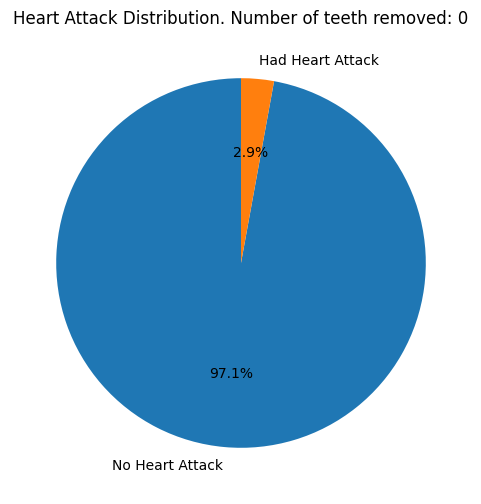

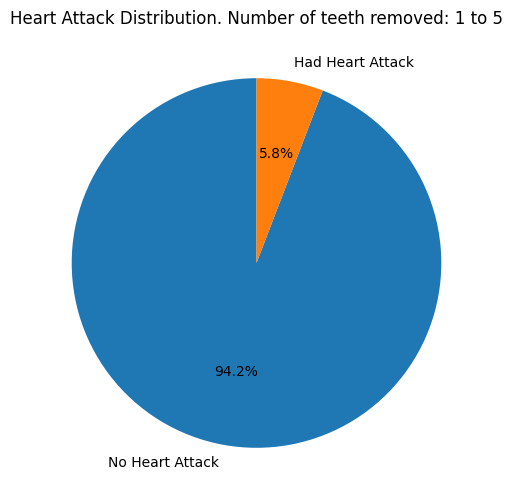

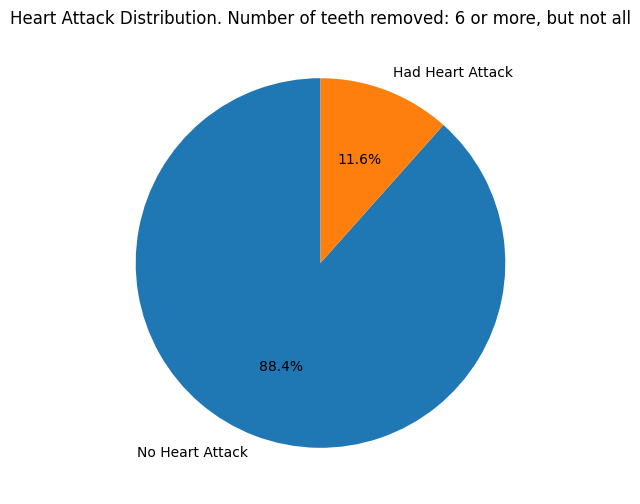

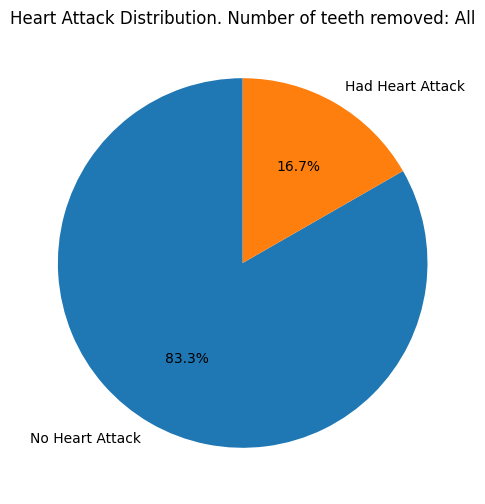

In [6]:
data['RemovedTeeth'] = data['RemovedTeeth'].replace('None of them', '0')
grouped = data.groupby(['RemovedTeeth', 'HadHeartAttack']).size().unstack(fill_value=0)

# Plot pie charts for each AgeCategory
for age_category in grouped.index:
    values = grouped.loc[age_category]
    labels = ['No Heart Attack', 'Had Heart Attack']
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Heart Attack Distribution. Number of teeth removed: {age_category}')
    plt.show()

In [8]:
data['RemovedTeeth'] = label_encoder.fit_transform(data['RemovedTeeth'])

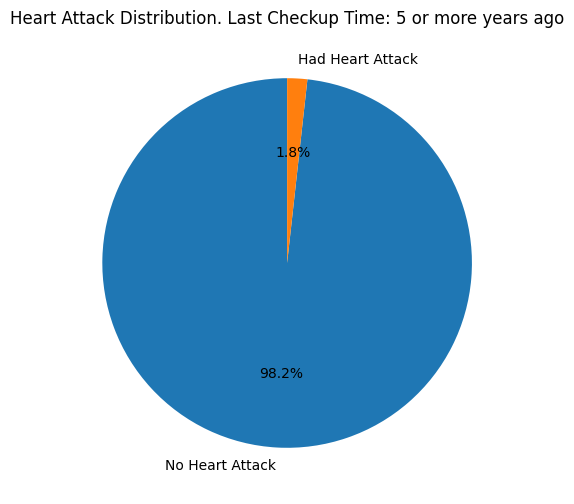

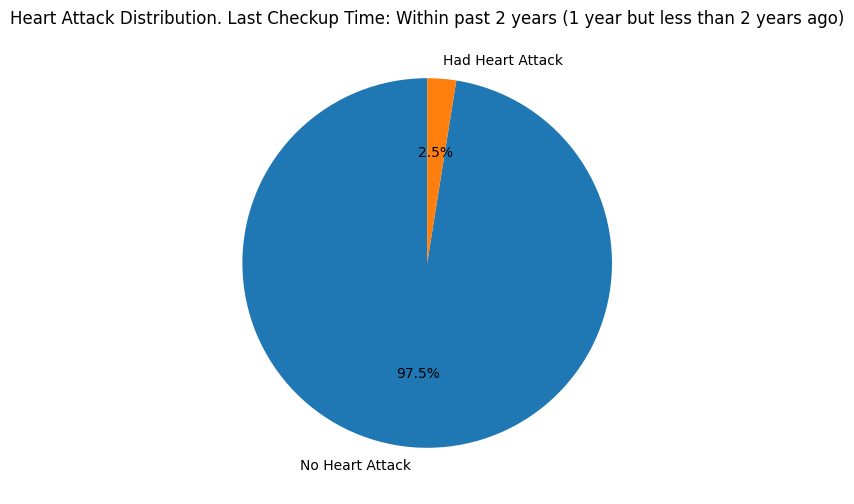

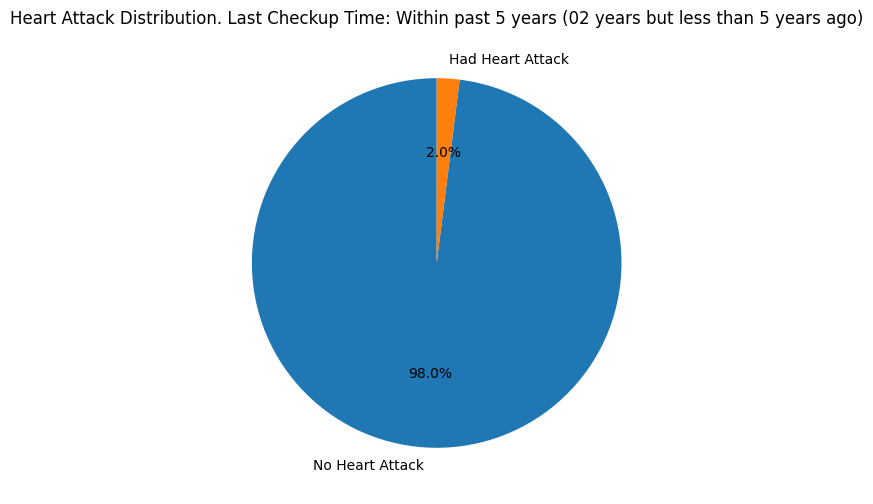

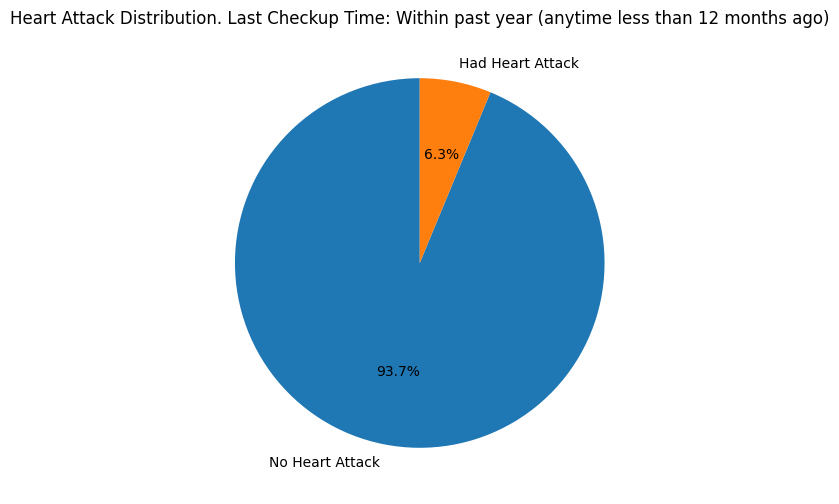

In [9]:

data['LastCheckupTime'] = data['LastCheckupTime'].replace('Within past 5 years (2 years but less than 5 years ago)', 'Within past 5 years (02 years but less than 5 years ago)')
grouped = data.groupby(['LastCheckupTime', 'HadHeartAttack']).size().unstack(fill_value=0)

# Plot pie charts for each AgeCategory
for age_category in grouped.index:
    values = grouped.loc[age_category]
    labels = ['No Heart Attack', 'Had Heart Attack']
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Heart Attack Distribution. Last Checkup Time: {age_category}')
    plt.show()

In [10]:
data['LastCheckupTime'] = label_encoder.fit_transform(data['LastCheckupTime'])

However, for TetanusLast10Tdap there is no such correspondence

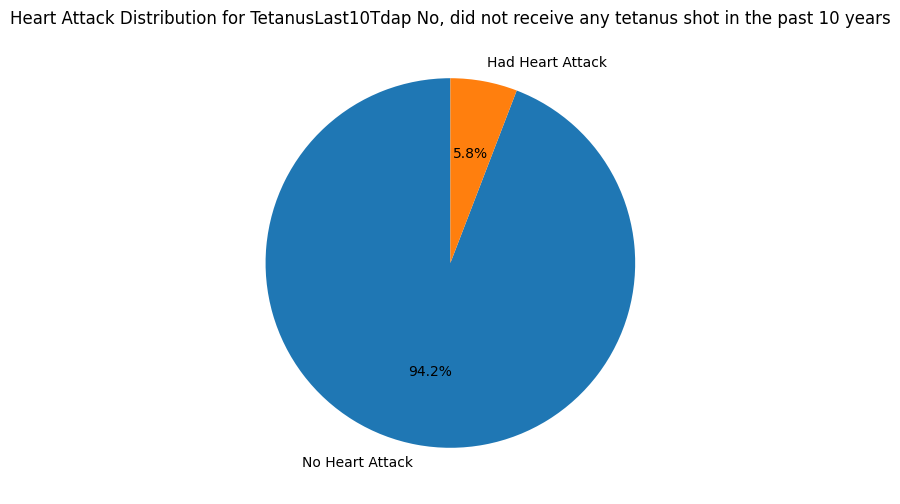

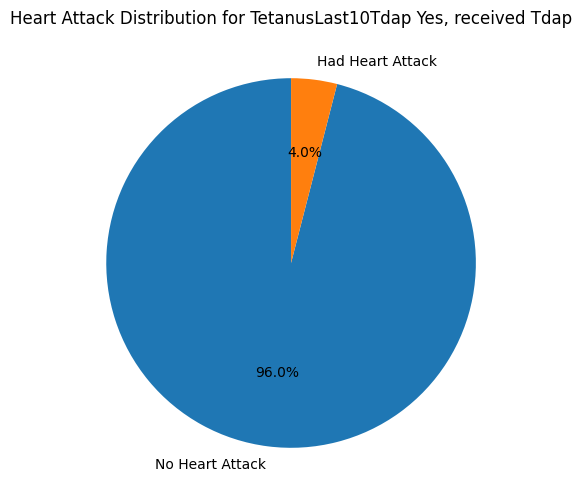

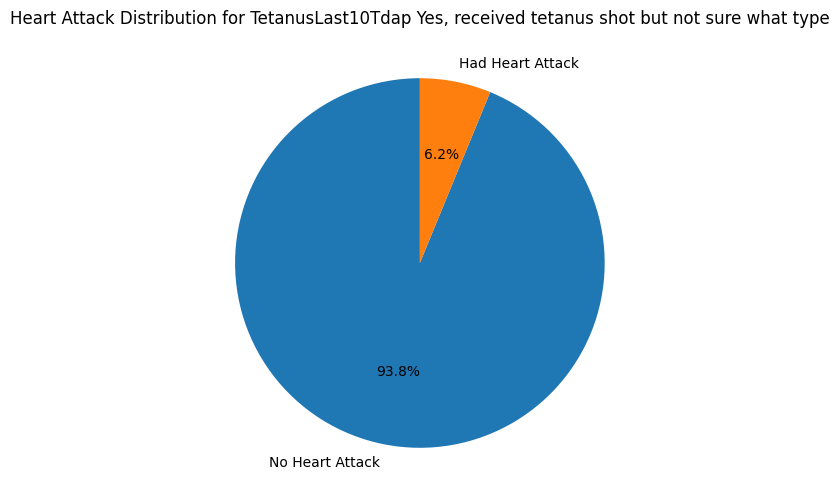

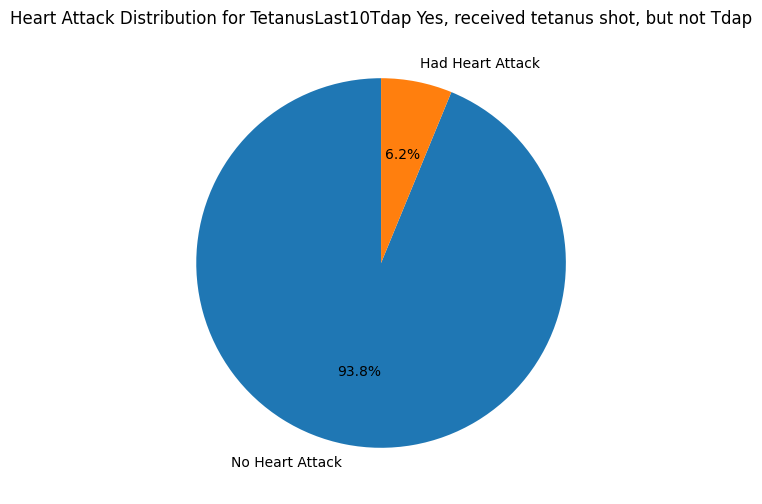

In [11]:
grouped = data.groupby(['TetanusLast10Tdap', 'HadHeartAttack']).size().unstack(fill_value=0)

# Plot pie charts for each AgeCategory
for age_category in grouped.index:
    values = grouped.loc[age_category]
    labels = ['No Heart Attack', 'Had Heart Attack']
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Heart Attack Distribution for TetanusLast10Tdap {age_category}')
    plt.show()

## Baseline (all zeros)

In [65]:
print('accuracy: ' + str(accuracy_score([0]*len(y_test), y_test)))

accuracy: 0.9453917284828778


## Gradient boosting (CatBoostClassifier)

CatBoost handles categorical features, so I'll just transform them to numbers. However, for further models these features will be one-hot encoded

In [85]:
label_encoder = LabelEncoder()
data_cat = data.copy()
categorical = ['AgeCategory', 'RemovedTeeth', 'LastCheckupTime']
for col in data.describe(include='object').columns:
    data_cat[col] = label_encoder.fit_transform(data[col])
    if col != 'HadHeartAttack': categorical.append(col)

df = data_cat.dropna(subset=['HadHeartAttack'])
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [80]:
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score



def cat_forecast(trainx, trainy, testx):
    model = CatBoostClassifier(loss_function='CrossEntropy', cat_features=categorical)
    model.fit(trainx, trainy)
    return model.predict(testx)

forecast = cat_forecast(X_train, y_train, X_test)

0:	learn: 0.6464654	total: 153ms	remaining: 2m 33s
1:	learn: 0.6027877	total: 309ms	remaining: 2m 34s
2:	learn: 0.5646574	total: 440ms	remaining: 2m 26s
3:	learn: 0.5290314	total: 561ms	remaining: 2m 19s
4:	learn: 0.4976776	total: 635ms	remaining: 2m 6s
5:	learn: 0.4669211	total: 808ms	remaining: 2m 13s
6:	learn: 0.4409479	total: 874ms	remaining: 2m 3s
7:	learn: 0.4151790	total: 956ms	remaining: 1m 58s
8:	learn: 0.3918461	total: 1.1s	remaining: 2m 1s
9:	learn: 0.3721801	total: 1.25s	remaining: 2m 4s
10:	learn: 0.3535063	total: 1.39s	remaining: 2m 5s
11:	learn: 0.3367520	total: 1.47s	remaining: 2m 1s
12:	learn: 0.3217311	total: 1.6s	remaining: 2m 1s
13:	learn: 0.3080042	total: 1.74s	remaining: 2m 2s
14:	learn: 0.2939168	total: 1.9s	remaining: 2m 4s
15:	learn: 0.2820683	total: 2.07s	remaining: 2m 7s
16:	learn: 0.2722611	total: 2.21s	remaining: 2m 7s
17:	learn: 0.2620723	total: 2.37s	remaining: 2m 9s
18:	learn: 0.2534462	total: 2.51s	remaining: 2m 9s
19:	learn: 0.2449706	total: 2.63s	rema

In [60]:
print('No hyperparameters tuning accuracy: ' + str(accuracy_score(forecast, y_test)))

No hyperparameters tuning accuracy: 0.9494563560613759


In [ ]:
values, counts = np.unique(forecast, return_counts=True)
print(values)
counts

[0 1]


array([48130,  1075])

In [74]:
def perf_measure(y_actual, y_hat):
   TP = 0
   FP = 0
   TN = 0
   FN = 0

   for i in range(len(y_hat)): 
      if y_actual[i]==y_hat[i]==1:
         TP += 1
      if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
         FP += 1
      if y_actual[i]==y_hat[i]==0:
         TN += 1
      if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
         FN += 1

   return(TP, FP, TN, FN)

In [81]:
mes = perf_measure(y_test.tolist(), forecast)
print('FN: ' + str(mes[3]))

FN: 2061


The model works much better than baseline(all zeros), as the accuracy is a bit better while also predicting different values. But we probably want to minimize false negatives considering the specifics of dataset - with health it's better be safe than sorry 

In [71]:
class_weights = {0: 1.0, 1: 5.0}

model = CatBoostClassifier(loss_function='Logloss', cat_features=categorical, class_weights=class_weights)
model.fit(X_train, y_train)
forecast = model.predict(X_test)

print('accuracy: ' + str(accuracy_score(forecast, y_test)))

Learning rate set to 0.098288
0:	learn: 0.6127978	total: 108ms	remaining: 1m 48s
1:	learn: 0.5536881	total: 253ms	remaining: 2m 6s
2:	learn: 0.5095007	total: 361ms	remaining: 1m 59s
3:	learn: 0.4768873	total: 445ms	remaining: 1m 50s
4:	learn: 0.4559847	total: 479ms	remaining: 1m 35s
5:	learn: 0.4319191	total: 576ms	remaining: 1m 35s
6:	learn: 0.4108912	total: 671ms	remaining: 1m 35s
7:	learn: 0.3960976	total: 758ms	remaining: 1m 34s
8:	learn: 0.3839621	total: 842ms	remaining: 1m 32s
9:	learn: 0.3735410	total: 922ms	remaining: 1m 31s
10:	learn: 0.3665993	total: 1.01s	remaining: 1m 31s
11:	learn: 0.3603125	total: 1.09s	remaining: 1m 30s
12:	learn: 0.3573549	total: 1.13s	remaining: 1m 26s
13:	learn: 0.3523515	total: 1.22s	remaining: 1m 25s
14:	learn: 0.3497241	total: 1.31s	remaining: 1m 26s
15:	learn: 0.3466207	total: 1.4s	remaining: 1m 26s
16:	learn: 0.3449220	total: 1.48s	remaining: 1m 25s
17:	learn: 0.3426868	total: 1.57s	remaining: 1m 25s
18:	learn: 0.3408686	total: 1.67s	remaining: 1

In [72]:
values, counts = np.unique(forecast, return_counts=True)
print(values)
counts

[0 1]


array([45715,  3490])

In [79]:
mes = perf_measure(y_test.tolist(), forecast)
print('FN: ' + str(mes[3]))

FN: 1242


The drop in False Negatives might be worth one percent of accuracy in this task

In [95]:
X_train1, X_val, y_train1, y_val= train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [ ]:
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    model = CatBoostClassifier(**params, silent=True)
    model.fit(X_train1, y_train1)
    forecast = model.predict(X_val)
    error = accuracy_score(forecast, y_val)
    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

In [97]:
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

Best hyperparameters: {'learning_rate': 0.0016831682477967693, 'depth': 1, 'subsample': 0.10699383578793863, 'colsample_bylevel': 0.66629363980835, 'min_data_in_leaf': 88}
Best accuracy: 0.9453815669139315


In [99]:
model = CatBoostClassifier(learning_rate= 0.0016831682477967693, depth= 1, subsample= 0.10699383578793863, colsample_bylevel= 0.66629363980835, min_data_in_leaf= 88, cat_features=categorical)
model.fit(X_train, y_train)
forecast = model.predict(X_test)

print('accuracy: ' + str(accuracy_score(forecast, y_test)))

0:	learn: 0.6905277	total: 18ms	remaining: 18s
1:	learn: 0.6879209	total: 34ms	remaining: 17s
2:	learn: 0.6857307	total: 52.3ms	remaining: 17.4s
3:	learn: 0.6835503	total: 70ms	remaining: 17.4s
4:	learn: 0.6812106	total: 86.2ms	remaining: 17.2s
5:	learn: 0.6786486	total: 103ms	remaining: 17s
6:	learn: 0.6765008	total: 117ms	remaining: 16.6s
7:	learn: 0.6739615	total: 134ms	remaining: 16.7s
8:	learn: 0.6714345	total: 151ms	remaining: 16.6s
9:	learn: 0.6693263	total: 166ms	remaining: 16.4s
10:	learn: 0.6671962	total: 183ms	remaining: 16.4s
11:	learn: 0.6650967	total: 197ms	remaining: 16.2s
12:	learn: 0.6626126	total: 211ms	remaining: 16s
13:	learn: 0.6601406	total: 226ms	remaining: 15.9s
14:	learn: 0.6576807	total: 242ms	remaining: 15.9s
15:	learn: 0.6556862	total: 258ms	remaining: 15.9s
16:	learn: 0.6536575	total: 273ms	remaining: 15.8s
17:	learn: 0.6515962	total: 288ms	remaining: 15.7s
18:	learn: 0.6491779	total: 304ms	remaining: 15.7s
19:	learn: 0.6467713	total: 321ms	remaining: 15.7s

In [100]:
values, counts = np.unique(forecast, return_counts=True)
print(values)
counts

[0 1]


array([49184,    21])

Best set of hyperparamters sets almost all values to zero and has worse accuracy than not tuned. Thus, in this case leaving hyperparameters for CatBoost to handle seems to be the best solution
## Fully connected NN
 
One-hot encoding

In [6]:
# List to hold one-hot encoded columns
encoded_cols = []

# Iterate over each categorical column and apply one-hot encoding
for col in data.describe(include='object').columns:
    encoded = pd.get_dummies(data[col], prefix=col, drop_first=True, dtype=float)
    encoded_cols.append(encoded)

data = pd.concat([data] + encoded_cols, axis=1).drop(columns=data.describe(include='object').columns)

In [7]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [29]:
df = data.dropna(subset=['HadHeartAttack_Yes'])
X = df.drop('HadHeartAttack_Yes', axis=1)
y = df['HadHeartAttack_Yes']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

In [139]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(len(data.columns) - 1, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [150]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=106, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


ReLu seems to be a universally good choice, Sigmoid gets value in [0 , 1] range

Adam is universally good as well

BCELoss is one of losses working with binary target and it happened to have the best results out of all I tried

In [113]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

In [147]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test).sum() / y_test.shape[0]
    print(f'Accuracy: {accuracy.item():.4f}')

Accuracy: 0.9486


In [148]:
torch.bincount(torch.squeeze(predicted.int()))

tensor([48001,  1204])

In [149]:
mes = perf_measure( y_test, torch.squeeze(predicted.int()).tolist())
print('FN: ' + str(mes[3]))
print('TP: ' + str(mes[0]))

FN: 2005
TP: 682
